### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Lendo os dados da base única de 2011 a 2021

In [108]:
df_accidents = pd.read_csv(
    "../../databases/acidentes2011_2021_tratado_v1.csv"
)
df_accidents.info()

/var/folders/z1/3syxl8gd5ks431s8c9n9mrs00000gn/T/ipykernel_24089/4028140512.py:1: DtypeWarning: Columns (7,18,21,26,27,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818848 entries, 0 to 2818847
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   pesid                   float64
 2   data_inversa            object 
 3   dia_semana              object 
 4   horario                 object 
 5   uf                      object 
 6   br                      float64
 7   km                      object 
 8   municipio               object 
 9   causa_acidente          object 
 10  tipo_acidente           object 
 11  classificacao_acidente  object 
 12  fase_dia                object 
 13  sentido_via             object 
 14  condicao_metereologica  object 
 15  tipo_pista              object 
 16  tracado_via             object 
 17  uso_solo                object 
 18  id_veiculo              object 
 19  tipo_veiculo            object 
 20  marca                   object 
 21  ano_fabricacao_veiculo  object 

#### Verificando informações da coluna

In [99]:
df_accidents["br"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2818848 entries, 0 to 2818847
Series name: br
Non-Null Count    Dtype  
--------------    -----  
2817449 non-null  float64
dtypes: float64(1)
memory usage: 21.5 MB


#### Verificando dados estatísticos da coluna antes do tratamento dos dados

In [100]:
df_accidents["br"].describe()

count    2.817449e+06
mean     2.137297e+02
std      1.292065e+02
min      0.000000e+00
25%      1.010000e+02
50%      1.630000e+02
75%      3.240000e+02
max      9.310000e+02
Name: br, dtype: float64

#### Verificando dados faltantes na coluna "br" antes do tratamento

In [109]:
df_accidents["br"].isna().sum()

np.int64(1399)

#### Tratando os dados para um único tipo

In [104]:
df_accidents["br"] = pd.to_numeric(df_accidents["br"], errors="coerce").astype("Int64")
df_accidents["br"].isna().sum()

np.int64(1399)

#### Tratando dados faltantes como "Desconhecido"

In [91]:
df_accidents[df_accidents["br"] == "Desconhecido"].shape

(0, 34)

#### Verificando dados estatísticos da coluna após do tratamento dos dados

In [105]:
df_accidents["br"].describe()

count     2817449.0
mean     213.729652
std      129.206516
min             0.0
25%           101.0
50%           163.0
75%           324.0
max           931.0
Name: br, dtype: Float64

#### Gerando gráfico de pizza dos dados para uma análise univariada, com os top 5 rodovias com mais acidentes para uma melhor visualização.

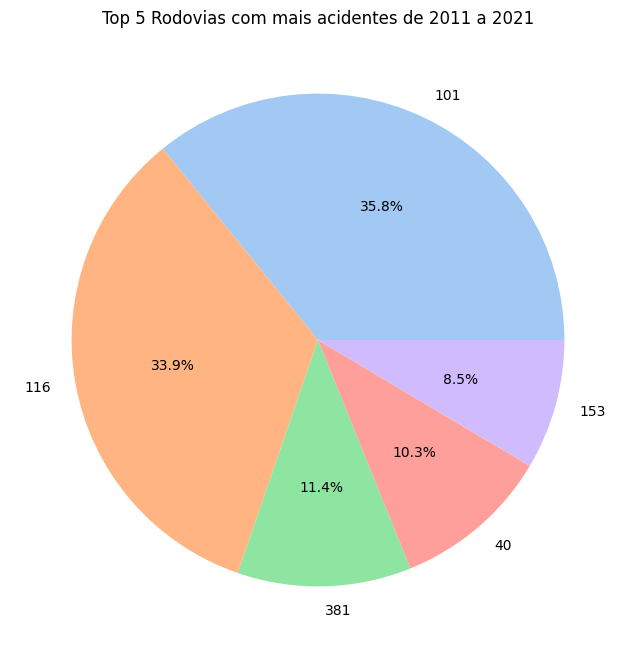

In [106]:
top_n = 5

df_counts = df_accidents["br"].value_counts().nlargest(top_n).reset_index()
df_counts.columns = ["Categoria", "Frequência"]

plt.figure(figsize=(8, 8))
plt.pie(df_counts["Frequência"], labels=df_counts["Categoria"], autopct="%1.1f%%", colors=sns.color_palette("pastel", len(df_counts)))
plt.title(f'Top {top_n} Rodovias com mais acidentes de 2011 a 2021')
plt.show()

#### Salvando os dados em um novo CSV após o tratamento de dados das colunas acima para ter uma base mais limpa

In [107]:
with open("../../databases/acidentes2011_2021_tratado_v1.csv", "w") as f:
    df_accidents.to_csv(f, index=False)